<a href="https://colab.research.google.com/github/melirandazzo/trabajo_ciencia_datos/blob/main/ProyectoDS_ParteIII_Randazzo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Análisis de riesgo crediticio***

El análisis del riesgo crediticio es esencial para las instituciones financieras, ya que les permite evaluar la capacidad de los solicitantes de préstamos para cumplir con sus obligaciones.
En este trabajo el objetivo es investigar los motivos frecuentes para solicitar un crédito, la relación entre la edad y los motivos de solicitud, los ingresos de los solicitantes en relación con el monto del préstamo y la capacidad de pago.


**Hipótesis General:**

Los solicitantes de crédito presentan diferentes comportamientos y riesgos de incumplimiento en función de factores demográficos y financieros, como la edad, el ingreso anual, la antigüedad laboral, la intención del préstamo, y el historial de cumplimiento de pago. En particular, los motivos más frecuentes para solicitar un crédito varían con la edad, y la capacidad de pago está significativamente influenciada por el ingreso anual y la proporción del ingreso destinada al préstamo.
Además, los solicitantes con mayor antigüedad laboral y un historial positivo de cumplimiento de pago tienen un menor riesgo de incumplimiento.


**Preguntas de Investigación:**

•	¿Cuáles son los motivos más frecuentes para solicitar un crédito?

•	¿Existe una relación significativa entre la edad de los solicitantes y los motivos para solicitar un crédito?

•	¿Qué proporción de los ingresos representan los créditos solicitados y cómo afecta esto a la capacidad de pago?

•	¿Cómo influye la antigüedad laboral de los solicitantes en el riesgo de incumplimiento del crédito?

•	¿Qué relación existe entre el historial de cumplimiento de pago y el riesgo de incumplimiento del crédito?

•	¿Cómo influye el grado del préstamo en el tipo de interés y el riesgo de incumplimiento?


Este informe preliminar plantea una visión general del análisis del riesgo crediticio basado en el motivo de solicitud, la edad de los solicitantes y su capacidad de pago. Proporciona una base para investigar cómo los factores mencionados afectan el comportamiento crediticio y el riesgo de incumplimiento de los solicitantes.

El destino de este trabajo es poder presentar un informe al equipo de gestión de créditos de una entidad bancaria a fin de facilitar la decisión de otorgar o no un crédito al solicitante prediciendo su capacidad de pago según el motivo, ingreso, situación laboral, historial crediticio y monto solicitado.

**Acciones realizadas en el trabajo:**

- Reemplazo de valores en ingles por su traduccion al español
- Renombrar columnas para una mayor facilidad en su uso e interpretación
- Detección, validación y depuración de datos vacios
- Detección, validación y depuración de datos sospechosos a traves del método describe
- Detección, validación y depuración de datos sospechosos a partir de la visualización en los gráficos

In [1]:
import pandas as pd
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
from matplotlib import dates as mpl_dates
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import  numpy as np
import seaborn as sns
import matplotlib as mpl
from mlxtend.plotting import plot_decision_regions
import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', None)

In [2]:
url = 'https://raw.githubusercontent.com/melirandazzo/trabajo_ciencia_datos/7d38fcd1eada1954588483f6e7121570966ed81a/credit_risk_dataset.csv'
df = pd.read_csv(url)
df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


Descripción de las columnas

- person_age: Edad
- person_income: Ingreso Anual
- person_home_ownership:	Posesion de vivienda
- person_emp_length:	Antigüedad laboral
- loan_intent:	Intención de préstamo
- loan_grade:	Grado del Prestamo
- loan_amnt:	Monto del prestamo
- loan_int_rate:	Interes
- loan_status:	Estado del credito (0 no es predeterminado 1 es predeterminado)
- loan_percent_income:	Porcentaje de ingreso
- cb_person_default_on_file:	Historial de cumplimiento de pago
- cb_preson_cred_hist_length:	Historia crediticia






In [3]:
# renombrar las columnas
df= df.rename(columns={"person_age": "EDAD",
                       "person_income": "INGRESO_ANUAL",
                       "person_home_ownership": "TIPO_VIVIENDA",
                       "person_emp_length":"ANTIGUEDAD_LABORAL",
                       "loan_intent":"INTENCION",
                       "loan_grade":"GRADO",
                       "loan_amnt":"MONTO",
                       "loan_int_rate":"INTERES",
                       "loan_status":"ESTADO",
                       "loan_percent_income":"POCENTAJE_INGRESO",
                       "cb_person_default_on_file":"HISTORIAL_CUMPLIMIENTO",
                       "cb_person_cred_hist_length":"HISTORIA_CREDITICIA"})
df.head()

,EDAD,INGRESO_ANUAL,TIPO_VIVIENDA,ANTIGUEDAD_LABORAL,INTENCION,GRADO,MONTO,INTERES,ESTADO,POCENTAJE_INGRESO,HISTORIAL_CUMPLIMIENTO,HISTORIA_CREDITICIA
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   EDAD                    32581 non-null  int64  
 1   INGRESO_ANUAL           32581 non-null  int64  
 2   TIPO_VIVIENDA           32581 non-null  object 
 3   ANTIGUEDAD_LABORAL      31686 non-null  float64
 4   INTENCION               32581 non-null  object 
 5   GRADO                   32581 non-null  object 
 6   MONTO                   32581 non-null  int64  
 7   INTERES                 29465 non-null  float64
 8   ESTADO                  32581 non-null  int64  
 9   POCENTAJE_INGRESO       32581 non-null  float64
 10  HISTORIAL_CUMPLIMIENTO  32581 non-null  object 
 11  HISTORIA_CREDITICIA     32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [5]:
df.shape

(32581, 12)

In [6]:
resumen=df.describe().round(1)
resumen

,EDAD,INGRESO_ANUAL,ANTIGUEDAD_LABORAL,MONTO,INTERES,ESTADO,POCENTAJE_INGRESO,HISTORIA_CREDITICIA
count,32581.0,32581.0,31686.0,32581.0,29465.0,32581.0,32581.0,32581.0
mean,27.7,66074.8,4.8,9589.4,11.0,0.2,0.2,5.8
std,6.3,61983.1,4.1,6322.1,3.2,0.4,0.1,4.1
min,20.0,4000.0,0.0,500.0,5.4,0.0,0.0,2.0
25%,23.0,38500.0,2.0,5000.0,7.9,0.0,0.1,3.0
50%,26.0,55000.0,4.0,8000.0,11.0,0.0,0.2,4.0
75%,30.0,79200.0,7.0,12200.0,13.5,0.0,0.2,8.0
max,144.0,6000000.0,123.0,35000.0,23.2,1.0,0.8,30.0


In [7]:
df["TIPO_VIVIENDA"]= df["TIPO_VIVIENDA"].astype("category")
df["INTENCION"]= df["INTENCION"].astype("category")
df["GRADO"]= df["GRADO"].astype("category")
df["HISTORIAL_CUMPLIMIENTO"]=df["HISTORIAL_CUMPLIMIENTO"].astype("category")

df.describe(include="category")

,TIPO_VIVIENDA,INTENCION,GRADO,HISTORIAL_CUMPLIMIENTO
count,32581,32581,32581,32581
unique,4,6,7,2
top,RENT,EDUCATION,A,N
freq,16446,6453,10777,26836


In [8]:
# Contar el numero de valores que son 0 por columnas
valores_faltantes = (df[['ANTIGUEDAD_LABORAL','POCENTAJE_INGRESO']] == 0).sum()
print(valores_faltantes)

ANTIGUEDAD_LABORAL    4105
POCENTAJE_INGRESO        9
dtype: int64


Valores en cero para la columnas ANTIGUEDAD_LABORAL representa la situacion crediticia de personas sin trabajo, se consideran valores validos.

Valores en cero para la columna POCENTAJE_INGRESO representa que el credito no impacta significativamente sobre el ingreso anual de la persona, se consideran valores validos.

In [9]:
# Contar  valores vacios de la columna intereses
intereses_faltantes = df[['INTERES']].isnull().sum()
intereses_faltantes


INTERES    3116
dtype: int64

Se detectan valores vacios para la columna intereses, no es un valor valido, se decide reemplazar por cero, interpretando que es un credito sin intereses

In [10]:
# Reemplazar valores nulos por cero de la columna INTERES
df[['INTERES']] = df[['INTERES']].fillna(0)
df

,EDAD,INGRESO_ANUAL,TIPO_VIVIENDA,ANTIGUEDAD_LABORAL,INTENCION,GRADO,MONTO,INTERES,ESTADO,POCENTAJE_INGRESO,HISTORIAL_CUMPLIMIENTO,HISTORIA_CREDITICIA
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


In [11]:
# Traducir valores en ingles al español para la columan TIPO_VIVIENDA

df[['TIPO_VIVIENDA']] = df[['TIPO_VIVIENDA']].replace('RENT', 'Alquila')
df[['TIPO_VIVIENDA']] = df[['TIPO_VIVIENDA']].replace('OWN', 'Propia')
df[['TIPO_VIVIENDA']] = df[['TIPO_VIVIENDA']].replace('MORTGAGE', 'Hipoteca')
df[['TIPO_VIVIENDA']] = df[['TIPO_VIVIENDA']].replace('OTHER', 'Otra')
df

,EDAD,INGRESO_ANUAL,TIPO_VIVIENDA,ANTIGUEDAD_LABORAL,INTENCION,GRADO,MONTO,INTERES,ESTADO,POCENTAJE_INGRESO,HISTORIAL_CUMPLIMIENTO,HISTORIA_CREDITICIA
0,22,59000,Alquila,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,Propia,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,Hipoteca,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,Alquila,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,Alquila,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,Hipoteca,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,Hipoteca,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,Alquila,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,Hipoteca,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


In [12]:
# Traducir valores en ingles al español para la columan INTENCION

df[['INTENCION']] = df[['INTENCION']].replace('DEBTCONSOLIDATION', 'Pago de deuda')
df[['INTENCION']] = df[['INTENCION']].replace('EDUCATION', 'Educación')
df[['INTENCION']] = df[['INTENCION']].replace('HOMEIMPROVEMENT', 'Contrucción')
df[['INTENCION']] = df[['INTENCION']].replace('MEDICAL', 'Salud')
df[['INTENCION']] = df[['INTENCION']].replace('PERSONAL', 'Personal')
df[['INTENCION']] = df[['INTENCION']].replace('VENTURE', 'Negocios')
df

,EDAD,INGRESO_ANUAL,TIPO_VIVIENDA,ANTIGUEDAD_LABORAL,INTENCION,GRADO,MONTO,INTERES,ESTADO,POCENTAJE_INGRESO,HISTORIAL_CUMPLIMIENTO,HISTORIA_CREDITICIA
0,22,59000,Alquila,123.0,Personal,D,35000,16.02,1,0.59,Y,3
1,21,9600,Propia,5.0,Educación,B,1000,11.14,0,0.10,N,2
2,25,9600,Hipoteca,1.0,Salud,C,5500,12.87,1,0.57,N,3
3,23,65500,Alquila,4.0,Salud,C,35000,15.23,1,0.53,N,2
4,24,54400,Alquila,8.0,Salud,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,Hipoteca,1.0,Personal,C,5800,13.16,0,0.11,N,30
32577,54,120000,Hipoteca,4.0,Personal,A,17625,7.49,0,0.15,N,19
32578,65,76000,Alquila,3.0,Contrucción,B,35000,10.99,1,0.46,N,28
32579,56,150000,Hipoteca,5.0,Personal,B,15000,11.48,0,0.10,N,26


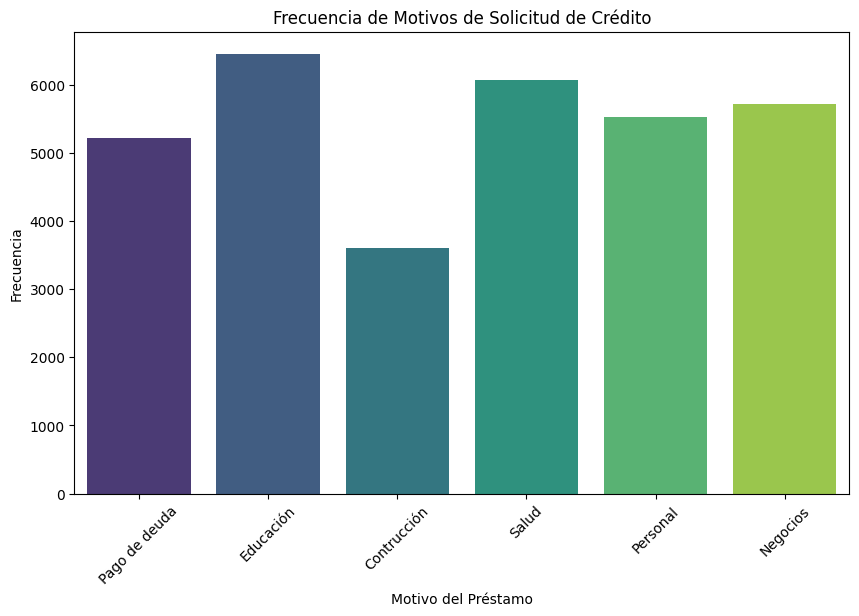

In [13]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='INTENCION', palette='viridis', hue='INTENCION')
plt.title('Frecuencia de Motivos de Solicitud de Crédito')
plt.xlabel('Motivo del Préstamo')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.show()

¿Cuáles son los motivos más frecuentes para solicitar un crédito?

En este gráfico se puede apreciar que el motivo más frecuente en la solicitud de un crédito es por educaducación, seguido por salud y negocios.

<Figure size 1200x600 with 0 Axes>

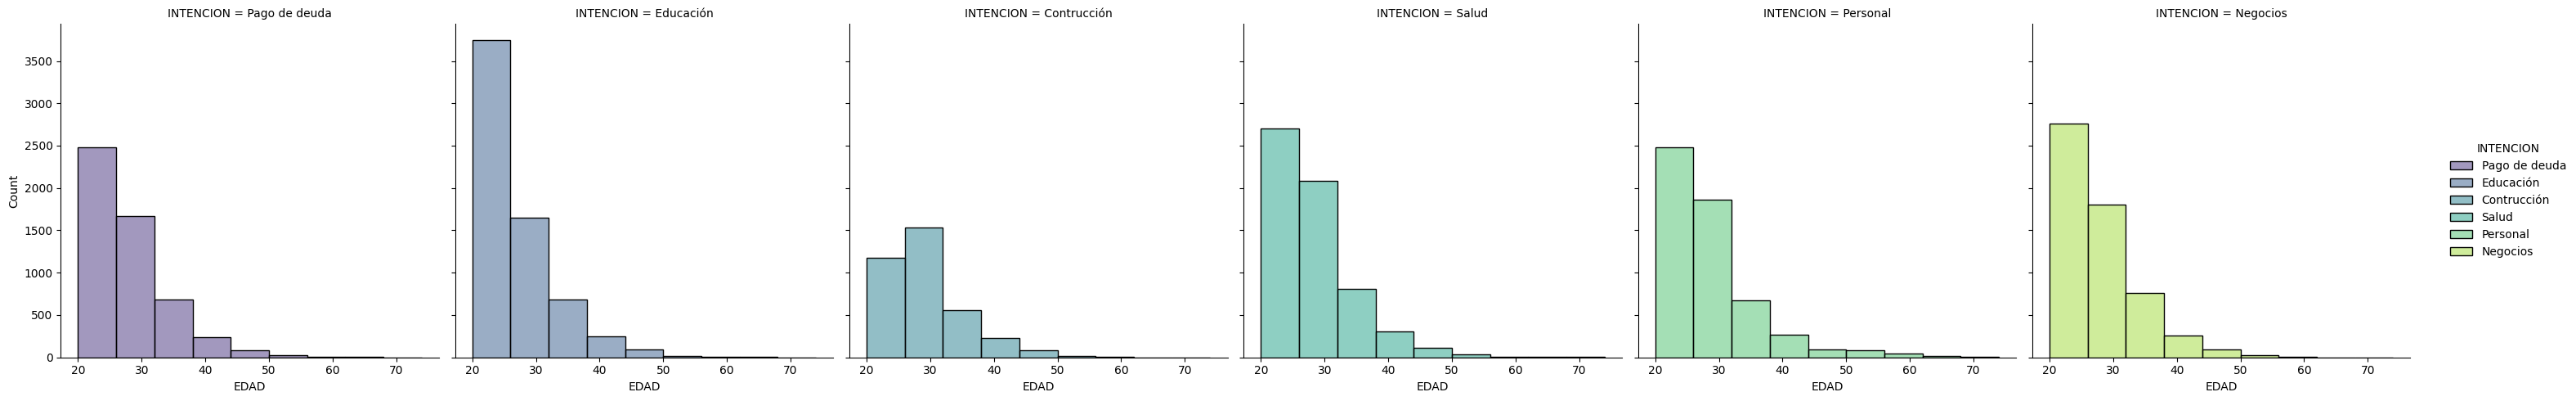

In [14]:
bin_width = 6
bin_range = range(20, 80, bin_width)

plt.figure(figsize=(12, 6))
sns.displot(data=df, x="EDAD", hue="INTENCION", col="INTENCION", bins=bin_range, palette='viridis')
plt.show()

¿Existe una relación significativa entre la edad de los solicitantes y los motivos para solicitar un crédito?

En este gráfico se puede ver la distribución de los créditos por motivo y edad. La mayor cantidad de créditos se toman entre los 20 y los 50 años.
En educación las personas más jovenes sacan la mayor cantidad de créditos.
Para créditos personales, el rango etario varia entre 20 y 30 años al igual que para la salud.
En construcción entre los 30 y 40 se toman la mayor cantidad de créditos.

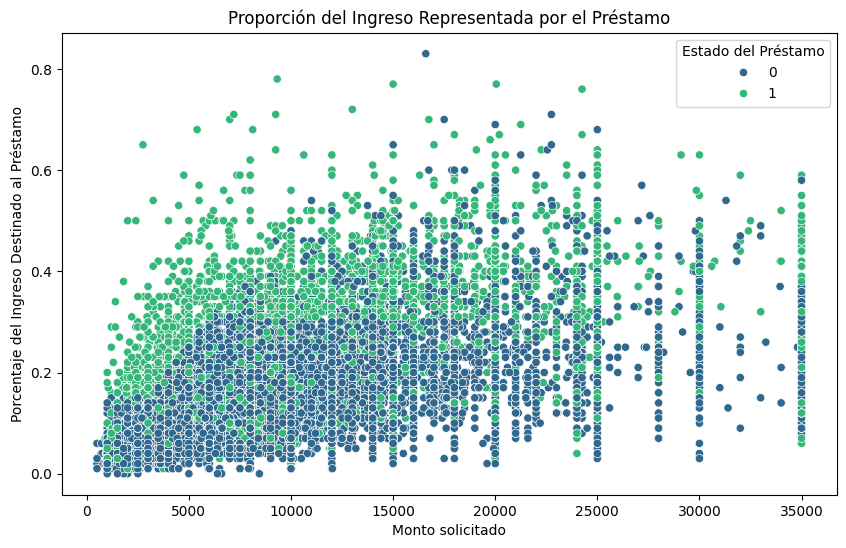

In [15]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='MONTO', y='POCENTAJE_INGRESO', hue='ESTADO', palette='viridis')
plt.title('Proporción del Ingreso Representada por el Préstamo')
plt.xlabel('Monto solicitado')
plt.ylabel('Porcentaje del Ingreso Destinado al Préstamo')
plt.legend(title='Estado del Préstamo')
plt.show()


¿Qué proporción de los ingresos representan los créditos solicitados y cómo afecta esto a la capacidad de pago?

En este gráfico se ve distribución de créditos en función del monto solucitado y el porcentaje de ingreso destinado a pagarlo. Se puede ver que a menor impacto en el salario el estado es mayormente el predeterminado, es decir que no presenta variaciones ni retrasos en los pagos. Mientras que cuando el monto solicitado representa un impacto mayor al 20% del salario para créditos menores a 5000 y un impacto mayor al 40% para créditos superiores a 10000 la capacidad de pago se ve más afectada y el estado del crédito no es predeterminado.

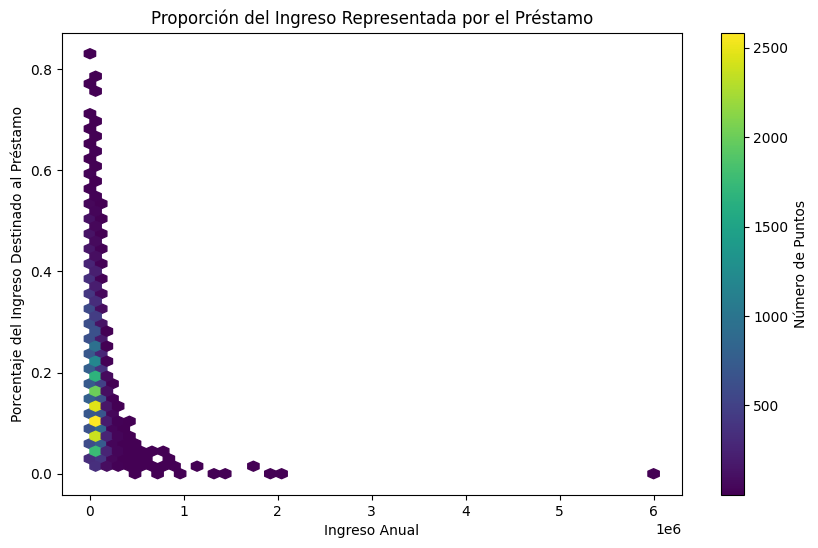

In [16]:
plt.figure(figsize=(10, 6))
plt.hexbin(df['INGRESO_ANUAL'], df['POCENTAJE_INGRESO'], gridsize=50, cmap='viridis', mincnt=1)
plt.colorbar(label='Número de Puntos')
plt.title('Proporción del Ingreso Representada por el Préstamo')
plt.xlabel('Ingreso Anual')
plt.ylabel('Porcentaje del Ingreso Destinado al Préstamo')
plt.show()

¿Qué proporción de los ingresos representan los créditos solicitados y cómo afecta esto a la capacidad de pago?

En este gráfico se observa que la mayoria de los créditos solicitados se encuentran en una relación del 20% en función del ingreso anual.
Y la relación entre ingreso y porcentaje de ingreso destinado al crédico es indirectamente proporcional, a menor ingreso mayor es el porcentaje destinado al crédito y viceversa.

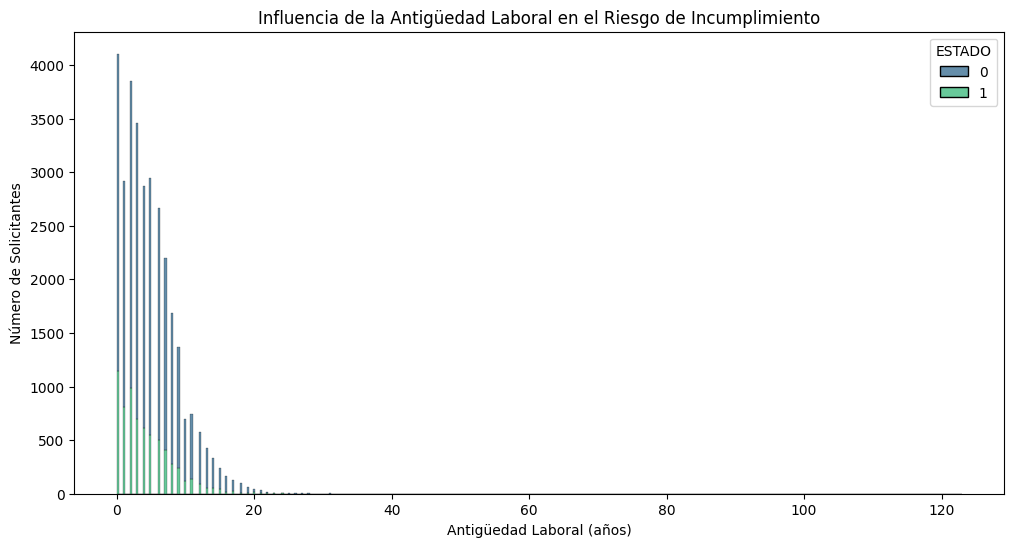

In [17]:
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='ANTIGUEDAD_LABORAL', hue='ESTADO', multiple='stack', palette='viridis')
plt.title('Influencia de la Antigüedad Laboral en el Riesgo de Incumplimiento')
plt.xlabel('Antigüedad Laboral (años)')
plt.ylabel('Número de Solicitantes')
plt.show()

¿Cómo influye la antigüedad laboral de los solicitantes en el riesgo de incumplimiento del crédito?

En este gráfico se observa que a menor antigüedad laboral mayor es la posibilidad de presentar irregularidades en el estado de los pagos.

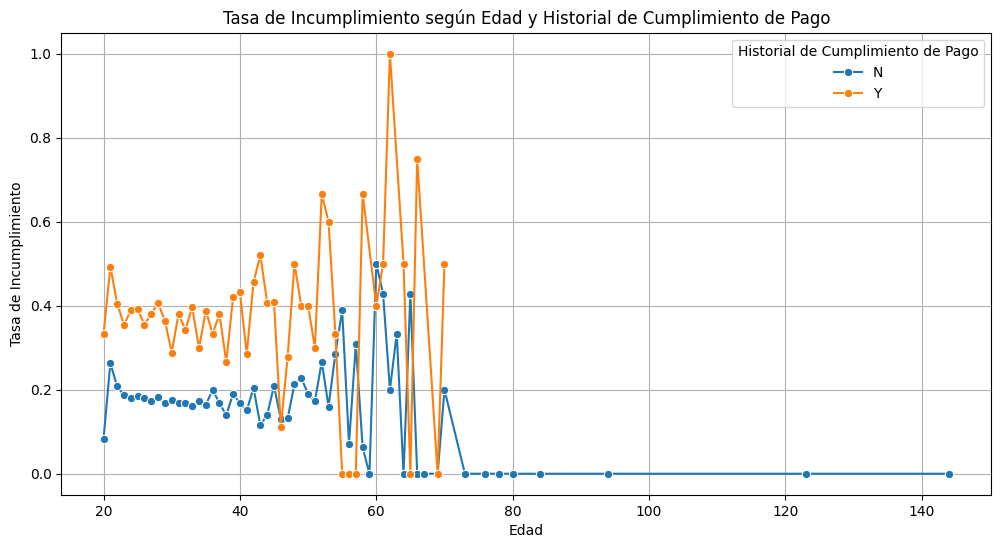

In [21]:

# Agrupar los datos por edad y historial de cumplimiento de pago y calcular la tasa de incumplimiento
df_grouped = df.groupby(['EDAD', 'HISTORIAL_CUMPLIMIENTO'])['ESTADO'].mean().reset_index()

# Crear el gráfico de líneas
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_grouped, x='EDAD', y='ESTADO', hue='HISTORIAL_CUMPLIMIENTO', marker='o')
plt.title('Tasa de Incumplimiento según Edad y Historial de Cumplimiento de Pago')
plt.xlabel('Edad')
plt.ylabel('Tasa de Incumplimiento')
plt.legend(title='Historial de Cumplimiento de Pago')
plt.grid(True)
plt.show()

¿Qué relación existe entre el historial de cumplimiento de pago y el riesgo de incumplimiento del crédito?

En este gráfico se puede observar que la tasa se cumplimiento entre los 60 y 70 años es mayor, interpretandose que son créditos saldados o casi saldados.
Superados los 70 años la tasa de cumplimiento es nula, alineandose con la expectativa de vida de las personas.
La tasa de cumplimiento en personas menores a 50 años es entre el 30% y 50%, mientras que la de incumpliento es menos al 20%.
La mayor tasa de cumpliemto se espera entre lo 50 y 70 años superando el 50%.

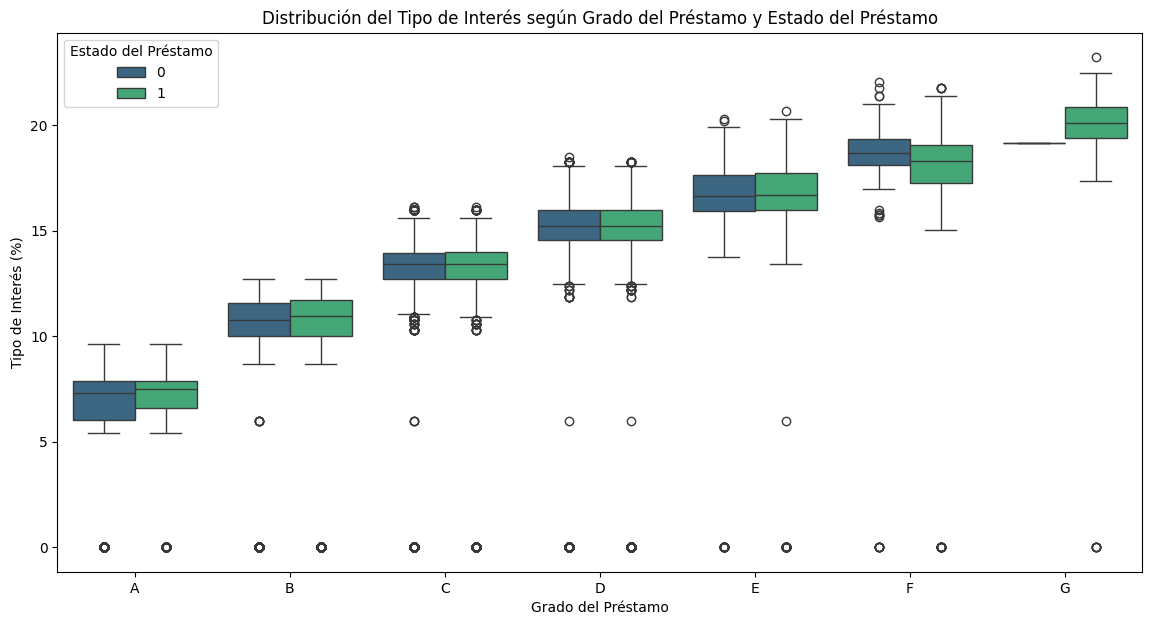

In [19]:
plt.figure(figsize=(14, 7))
sns.boxplot(data=df, x='GRADO', y='INTERES', hue='ESTADO', palette='viridis')
plt.title('Distribución del Tipo de Interés según Grado del Préstamo y Estado del Préstamo')
plt.xlabel('Grado del Préstamo')
plt.ylabel('Tipo de Interés (%)')
plt.legend(title='Estado del Préstamo')
plt.show()

¿Cómo influye el grado del préstamo en el tipo de interés y el riesgo de incumplimiento?

Se puede observar que hay excepciones de casos donde los interes son del 0% y casos donde superan el 20%.
Los casos de intereses más altos como los créditos de grado G tienen una mayor tasa de incumplimiento, mientras que los casos de intereses más bajos la tasa de incumplimuiento es menor.

**Depuración de datos**

In [22]:
# Se observa una variacion irregular de un caso cuyo ingreso anual es mayor a 6millones, lo que distorciona la muestra y decido eliminarlas.
count = df[df['INGRESO_ANUAL'] == 6000000].shape[0]
count

1

In [23]:
df = df[df['INGRESO_ANUAL'] < 6000000]
df


,EDAD,INGRESO_ANUAL,TIPO_VIVIENDA,ANTIGUEDAD_LABORAL,INTENCION,GRADO,MONTO,INTERES,ESTADO,POCENTAJE_INGRESO,HISTORIAL_CUMPLIMIENTO,HISTORIA_CREDITICIA
0,22,59000,Alquila,123.0,Personal,D,35000,16.02,1,0.59,Y,3
1,21,9600,Propia,5.0,Educación,B,1000,11.14,0,0.10,N,2
2,25,9600,Hipoteca,1.0,Salud,C,5500,12.87,1,0.57,N,3
3,23,65500,Alquila,4.0,Salud,C,35000,15.23,1,0.53,N,2
4,24,54400,Alquila,8.0,Salud,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,Hipoteca,1.0,Personal,C,5800,13.16,0,0.11,N,30
32577,54,120000,Hipoteca,4.0,Personal,A,17625,7.49,0,0.15,N,19
32578,65,76000,Alquila,3.0,Contrucción,B,35000,10.99,1,0.46,N,28
32579,56,150000,Hipoteca,5.0,Personal,B,15000,11.48,0,0.10,N,26


In [24]:
# Se observa una variacion irregular de dos casos cuya antigüedad laboral supero los 60 años, lo que distorciona la muestra y decido eliminarlas.
count = df[df['ANTIGUEDAD_LABORAL'] > 60].shape[0]
count

2

In [25]:
df = df[df['ANTIGUEDAD_LABORAL'] < 60]
df

,EDAD,INGRESO_ANUAL,TIPO_VIVIENDA,ANTIGUEDAD_LABORAL,INTENCION,GRADO,MONTO,INTERES,ESTADO,POCENTAJE_INGRESO,HISTORIAL_CUMPLIMIENTO,HISTORIA_CREDITICIA
1,21,9600,Propia,5.0,Educación,B,1000,11.14,0,0.10,N,2
2,25,9600,Hipoteca,1.0,Salud,C,5500,12.87,1,0.57,N,3
3,23,65500,Alquila,4.0,Salud,C,35000,15.23,1,0.53,N,2
4,24,54400,Alquila,8.0,Salud,C,35000,14.27,1,0.55,Y,4
5,21,9900,Propia,2.0,Negocios,A,2500,7.14,1,0.25,N,2
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,Hipoteca,1.0,Personal,C,5800,13.16,0,0.11,N,30
32577,54,120000,Hipoteca,4.0,Personal,A,17625,7.49,0,0.15,N,19
32578,65,76000,Alquila,3.0,Contrucción,B,35000,10.99,1,0.46,N,28
32579,56,150000,Hipoteca,5.0,Personal,B,15000,11.48,0,0.10,N,26


In [26]:
# Se observa una variacion irregular de CASOS cuya edad supera los 100 años, lo que distorciona la muestra y decido eliminarlas.
count = df[df['EDAD'] > 100].shape[0]
count

4

In [27]:
df = df[df['EDAD'] < 100]
df

,EDAD,INGRESO_ANUAL,TIPO_VIVIENDA,ANTIGUEDAD_LABORAL,INTENCION,GRADO,MONTO,INTERES,ESTADO,POCENTAJE_INGRESO,HISTORIAL_CUMPLIMIENTO,HISTORIA_CREDITICIA
1,21,9600,Propia,5.0,Educación,B,1000,11.14,0,0.10,N,2
2,25,9600,Hipoteca,1.0,Salud,C,5500,12.87,1,0.57,N,3
3,23,65500,Alquila,4.0,Salud,C,35000,15.23,1,0.53,N,2
4,24,54400,Alquila,8.0,Salud,C,35000,14.27,1,0.55,Y,4
5,21,9900,Propia,2.0,Negocios,A,2500,7.14,1,0.25,N,2
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,Hipoteca,1.0,Personal,C,5800,13.16,0,0.11,N,30
32577,54,120000,Hipoteca,4.0,Personal,A,17625,7.49,0,0.15,N,19
32578,65,76000,Alquila,3.0,Contrucción,B,35000,10.99,1,0.46,N,28
32579,56,150000,Hipoteca,5.0,Personal,B,15000,11.48,0,0.10,N,26


Matriz de correlación

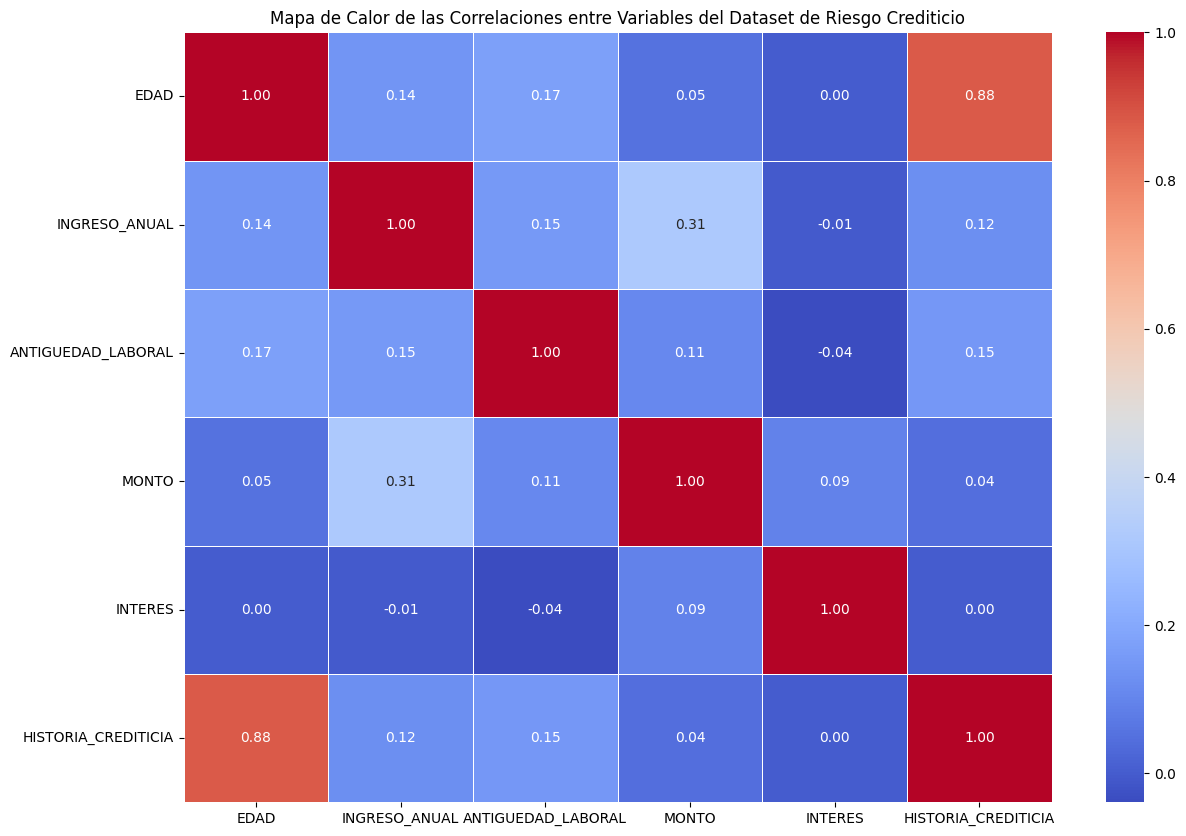

In [43]:
columns_of_interest = [
    'EDAD', 'INGRESO_ANUAL', 'ANTIGUEDAD_LABORAL', 'MONTO',
    'INTERES', 'HISTORIA_CREDITICIA'
]

df_selected = df[columns_of_interest]
df_encoded = pd.get_dummies(df_selected, drop_first=True)
correlation_matrix = df_encoded.corr()

plt.figure(figsize=(14, 10))

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

plt.title('Mapa de Calor de las Correlaciones entre Variables del Dataset de Riesgo Crediticio')

plt.show()

# **Regresion lineal**

In [76]:
#Feature/variable independiente
X = df[['MONTO']]

#Target/variable dependiente (Variable a predecir)
y = df[['INGRESO_ANUAL']]

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state=0)

regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [77]:
# Obtener la pendiente
slope = regressor.coef_

# Obtener los coeficientes de intercepción
intercept = regressor.intercept_

print("este es el valor de la pendiente:", slope.round(1))
print("este es el valor del intercepto:", intercept.round(1))

este es el valor de la pendiente: [[2.6]]
este es el valor del intercepto: [41068.]


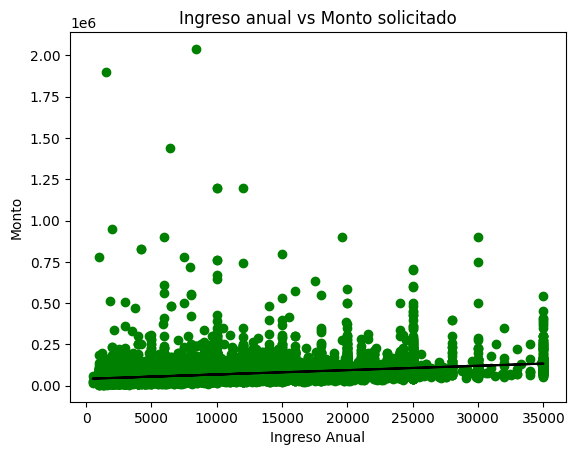

In [78]:
viz_train = plt
viz_train.scatter(X_train, y_train, color = 'g')
viz_train.plot(X_train, regressor.predict(X_train), color = 'black')
viz_train.title('Ingreso anual vs Monto solicitado')
viz_train.xlabel('Ingreso Anual')
viz_train.ylabel('Monto')
viz_train.show()

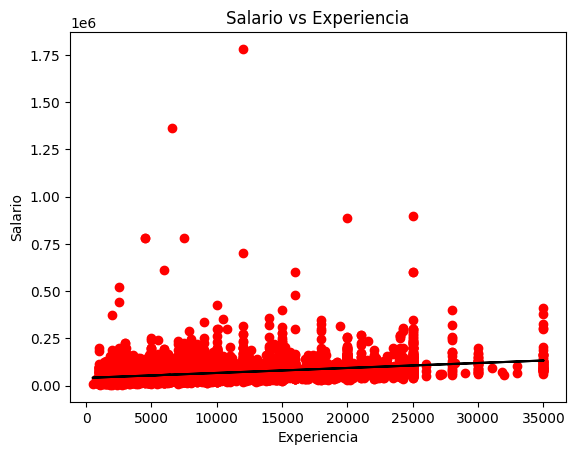

In [79]:
#Visualización de los datos de prueba
viz_test = plt
viz_test.scatter(X_test, y_test, color = 'red')
viz_test.plot(X_test, regressor.predict(X_test), color = 'black')
viz_test.title('Salario vs Experiencia')
viz_test.xlabel('Experiencia')
viz_test.ylabel('Salario')
viz_test.show()

In [80]:
#Score del modelo en entrenamiento
regressor.score(X_train, y_train)

0.09761599692157485

In [81]:
#Score del modelo en testeo
regressor.score(X_test, y_test)

0.102631037130133

# **KNN**

In [44]:
X = df[['INGRESO_ANUAL', 'EDAD']]
y = df['HISTORIAL_CUMPLIMIENTO'].replace({'N':0, 'Y':1})

# Importar las librerias del modelo
from sklearn.neighbors import KNeighborsClassifier

# Crear la instancia del modelo
clf = KNeighborsClassifier(n_neighbors=10)

# Entrenar el modelo con los datos y la etiqueta
clf.fit(X, y)

KNeighborsClassifier(n_neighbors=10)

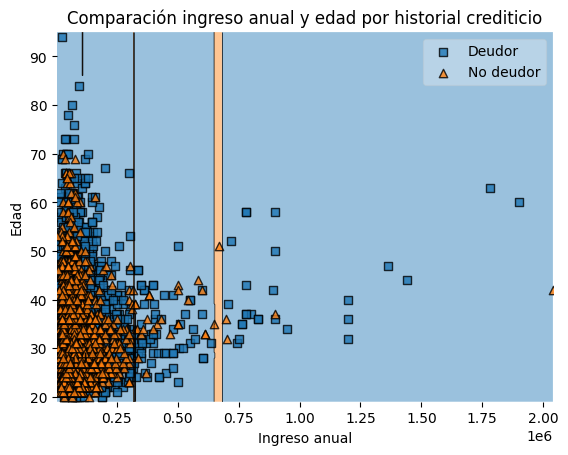

In [45]:
X2= X.values
y2= np.array(y.values)

ax=plot_decision_regions(X2, y2, clf=clf)

plt.xlabel('Ingreso anual')
plt.ylabel('Edad')
plt.title('Comparación ingreso anual y edad por historial crediticio')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles,
          ['Deudor', 'No deudor'],
           framealpha=0.3, scatterpoints=1)
plt.show()

# **Árbol** de decisión

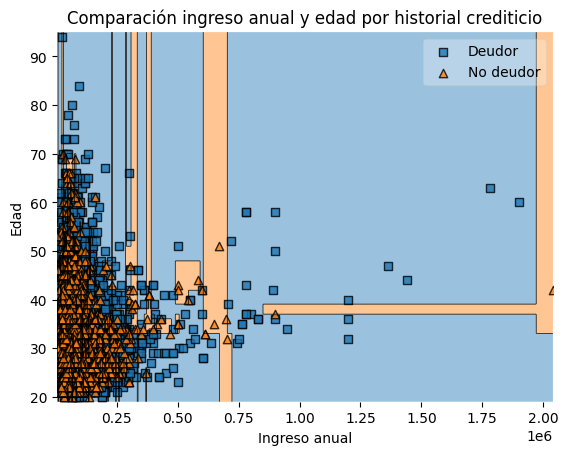

In [47]:
# Importar las librerias del modelo
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn import tree

clf = DecisionTreeClassifier()
# Entrenar el modelo con los datos y la etiqueta
clf.fit(X, y)

X2= X.values
y2= np.array(y.values)

ax=plot_decision_regions(X2, y2, clf=clf)

plt.xlabel('Ingreso anual')
plt.ylabel('Edad')
plt.title('Comparación ingreso anual y edad por historial crediticio')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles,
          ['Deudor', 'No deudor'],
           framealpha=0.3, scatterpoints=1)
plt.show()

In [48]:
# Crear la instancia del modelo
clf = DecisionTreeClassifier(max_depth=6)

# Entrenar el modelo con los datos y la etiqueta
X= df[['INGRESO_ANUAL', 'EDAD', 'ANTIGUEDAD_LABORAL', 'MONTO']]
y= df['HISTORIAL_CUMPLIMIENTO']

#X = df.drop('species', axis=1)
#y = df['species']

clf = clf.fit(X, y)

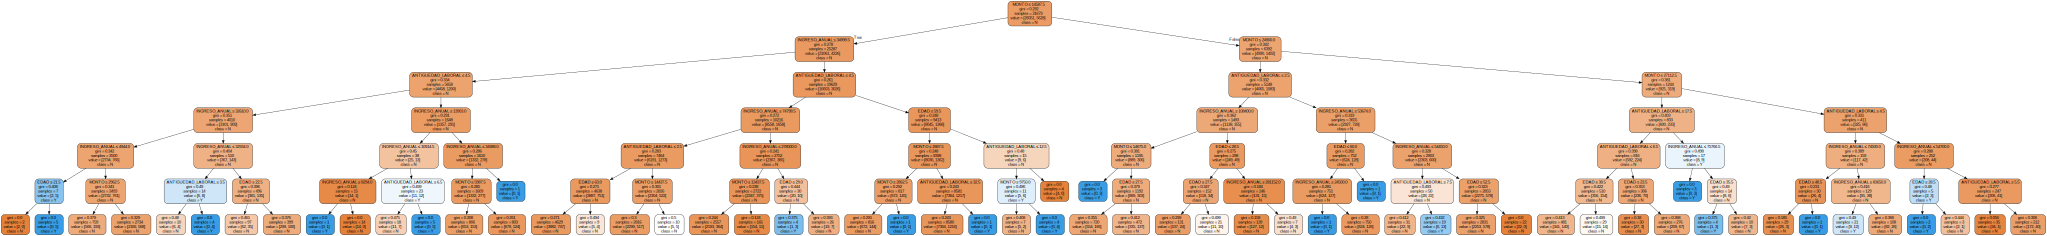

In [49]:
# Exportar el árbol de decisión a Graphviz
import graphviz
dot_data = tree.export_graphviz(clf, out_file=None,
                                feature_names=X.columns,
                                class_names=y.unique(),
                                filled=True, rounded=True,
                                special_characters=True)
graph = graphviz.Source(dot_data)
graph